
# <p style="text-align: center;">MIS382: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 4</p>
## <p style="text-align: center;">Total points: 75</p>
## <p style="text-align: center;">Due: Tuesday, November 12th, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Your partner needs to be from the same section. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know. 

Please ensure that the notebook you have uploaded on Canvas is the correct one, you could download the notebook from Canvas to double check that you have submitted the correct version on your notebook.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

### Name(s)
1. Christopher Henson - cgh966
2. Rawini Dias - rwd635

## Question 1 - Expected Risk Minimization (15 pts)
Consider a binary classification problem with the following loss matrix -
$$
   {\begin{array}{ccccc}
   & & \text{Predicted class} & \text{           } &\\
   & & C1 & C2 & Reject\\
   \text{True class} & C1 & 0 & 3 & c  \\
   & C2 & 2 & 0 & c \\
  \end{array} } 
$$
where the cost of rejection is a constant. Determine the prediction that minimizes the expected loss in different ranges of $P(C1|x)$ for the following three cases - 
1. c = 0
2. c = 2
3. c = 1

First, let's calculate our loss. We will define $P(C1|x) = p$

So we have

$C1$ Loss:

$$
0p + 2(1-p) = 2-2p  
$$

$C2$ Loss:

$$
3p + 0(1-p) = 3p  
$$

Reject Loss:

$$
cp + c(1-p) = c  
$$

### Answer

1. 

In [40]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [41]:
c = 0

p = np.linspace(0, 1, 51)
c1 = 2-2*p
c2 = 3*p
reject = c*np.ones(len(p))

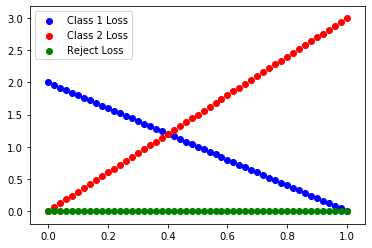

In [42]:
plt.scatter(p, c1, color = 'blue', label = 'Class 1 Loss')
plt.scatter(p, c2, color = 'red', label = 'Class 2 Loss')
plt.scatter(p, reject, color = 'green', label = 'Reject Loss')
plt.legend()

In the case where c = 0, we can always reject to minimize loss. Note that at p = 0 we would select C2 and at p = 1 we would select C1.

2. 

In [43]:
c = 2
reject = c*np.ones(len(p))

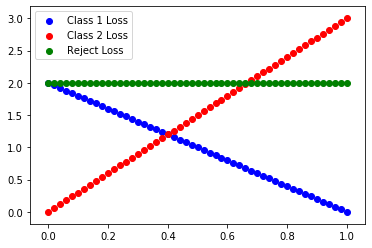

In [44]:
plt.scatter(p, c1, color = 'blue', label = 'Class 1 Loss')
plt.scatter(p, c2, color = 'red', label = 'Class 2 Loss')
plt.scatter(p, reject, color = 'green', label = 'Reject Loss')
plt.legend()

In the case where c = 2, rejecting never minimizes loss. 

- from p = 0 to p = .4, we would select Class 2
- from p = .4 to p = 1 we would select Class 1. 

Note that if p = .4 loss is equivalent (we could select either class and minimize loss). 

3. 

In [45]:
c = 1
reject = c*np.ones(len(p))

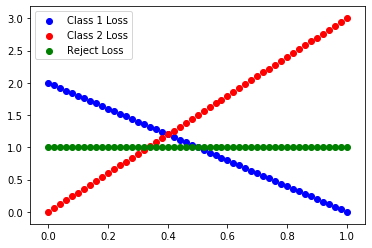

In [46]:
plt.scatter(p, c1, color = 'blue', label = 'Class 1 Loss')
plt.scatter(p, c2, color = 'red', label = 'Class 2 Loss')
plt.scatter(p, reject, color = 'green', label = 'Reject Loss')
plt.legend()

In the case where c = 1, we have three ranges:

- from p = 0 to p = 1/3, we would select Class 2,
- from p = 1/3 to p = .5, we would reject, and
- from p = .5 to p = 1, we would select Class 1

(Note again that at p = 1/3 and p = .5, we have two options with equivalent loss)

## Question 2 - Concepts (10 pts)

Emma is a high school student who is creating a model for spam classification, which is well known to be an imbalanced classification problem. During the course of modeling, she had various observations and she is not sure if these observations suggest anything about the correctness of her modeling exercise. You are given two such instances below. For each observation identify what the problem with it may be (if any) and suggest a way to correct it. 

1. She thinks that the most important signal to identify spam emails is the sender. So, she creates a feature called is_sender_spammer and populates it with the percentage of emails sent by the sender that were spam, in the given dataset. The way she created this feature was - for each email, she counted the number of emails sent by each sender which were labeled as true spam and divided by the total number of emails sent by the sender. She then divides the given dataset into train and test and trains a logistic regression classifier using just this one feature. The AUROC on the test dataset comes out to be 0.99. She thinks this is too good to be true. What do you think may be the problem with her approach, and how can this be fixed?

2. She then changes her approach and tries multiple sets of features with different models. She finds out that whatever features or models she uses the classification accuracy on the test dataset is always above 90%. Why do you think this could happen?


### Answer

1. Her regression classifier is giving her a good AUROC because she is using a feature derived from the class labels itself. The issue with this method is that the derived feature "is_sender_spammer" uses information from the class label which would not be available in the test set. Put another way, the model is trained on information that would not be available when making a prediction. If she were to use her model to predict on new test data, her AUROC would be lower.
She needs to do her train/test split first and then create the feature using only her train set. Then, once she identifies the senders that typically send spam, she can use that on her test set to assess the model performance. Also, she needs to identify additional features with predicitive power that can be used in her model.


2. This might be a result of the imbalanced nature of her dataset. Her model might be predicting the class that is more prevalent and thereby getting the higher classification accuracy. Also, since her dataset is imbalanced, she should use AUROC to assess model performance instead of accuracy.

# Question 3 - Churn Prediction (50pts)

In this problem, you are provided with data from a bank. The objective is to process the data and build predictive models to classify if a customer is going to churn or not. You will be using sklearn [pipelines](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) and transformers in this exercise.


1. What proportion of the users in the data churn? (2pts)
2. Do credit card users churn more when compared to other users? (use a suitable plot) (3pts)
3. Set up the transformer for min-max normalization. Other required transformers are provided. (5pts)
4. Scikit-learn provides the capability to create Machine Learning workflows by using a construct known as Pipeline. ML modeling pipelines can be viewed as directed acyclic graphs where each node is an "operator" performing some processing on the data frames or ndarrays. Use this [guide](https://medium.com/vickdata/a-simple-guide-to-scikit-learn-pipelines-4ac0d974bdcf) to understand how to create a pipeline and create a pipeline which has the following steps:<br>
    a. One hot encoding transformer on the categorical variables.<br>
    b. Min-max normalization transformer on the continuous variables.<br>
    c. Logistic Regression model.<br>
    Using the code for transformers given to you, fit this pipeline on the train set and report the F1 score and AUROC on the test set. (10pts)   
5. Add the following features to the data:<br>
    a. Ratio of balance to salary.<br>
    b. Ratio of tenure to age.<br>
    c. Ratio of credit score to age.<br>
   Using this new data, build a similar Logistic Regression pipeline as in the previous question and report the F1 score and AUROC on the test set. We see that the performance of the model improves with these additional features, hence we will be using the new dataset with these additional features from now (this question and all the questions ahead). 
   We have seen that the two classes are imbalanced in the data. We can improve the logistic regression model by changing the importance given to the classes - use the class_weight='balanced' option (by default, both classes have equal importance). Report the F1 score and AUROC on the test set. (10 pts)
6. Build multiple MLP pipelines by varying the number of hidden units, activation and optimizer (atleast 12). Plot the ROC curve for the different MLP pipeleines using the test set (in one plot - use markers since the number of colors are limited).  Report your best F1 score on the test set. (10pts)
7. Build a decision tree and Gaussian Naive Bayes pipelines. Plot an ROC for these two models, the improved logistic regression model and the best MLP model (in one plot). (5pts).
8. The calibration curve gives you a way of testing if your model is well-calibrated or not. Use sklearn's [calibration_curve](https://scikit-learn.org/stable/modules/generated/sklearn.calibration.calibration_curve.html) function to plot the calibration curve for the Gaussian Naive Bayes model, the improved logistic regression model, and the best MLP model and report which models are well-calibrated and which ones are not. (5 pts)

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline, FeatureUnion
import warnings
warnings.filterwarnings('ignore')

In [48]:
df = pd.read_csv('q3.csv', delimiter=',')
df.shape
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Answer

#### (1)

In [49]:
df['Exited'].sum()/len(df)

0.2037

#### (2)

In [50]:
cc_user = df[df['HasCrCard'] == 1]
non_cc_user = df[df['HasCrCard'] == 0]

In [51]:
cc_user['Exited'].sum()/len(cc_user)

0.20184266477675408

In [52]:
non_cc_user['Exited'].sum()/len(non_cc_user)

0.20814940577249574

Non-credit card users churn more.

In [53]:
churn = pd.crosstab(df['HasCrCard'], df['Exited'])
display(churn)

Exited,0,1
HasCrCard,,
0,2332,613
1,5631,1424


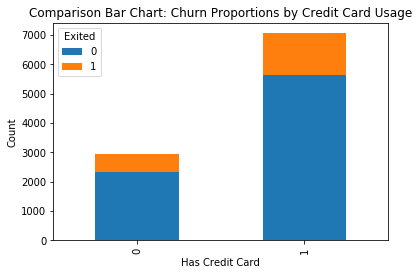

In [54]:
#Stacked Barplot of Credit Card Use and Churn
churn.plot(kind = 'bar', stacked = 'true', title = "Comparison Bar Chart: Churn Proportions by Credit Card Usage")
plt.xlabel('Has Credit Card')
plt.ylabel('Count')
plt.show()

In [55]:
#DONOT CHANGE THIS
df_train = df.sample(frac=0.8,random_state=11)
df_test = df.drop(df_train.index)

from sklearn.base import BaseEstimator, TransformerMixin
#We provide the required transformers to build the pipeline.
# Transfomer for performing one hot encoding on a specified categorical column
class OneHotEncoder(BaseEstimator, TransformerMixin):
    
    def __init__(self,col):
        self.col = col
                
    def transform(self, X):
        return pd.get_dummies(X[self.col]) 

    def fit(self, X, y=None):
        return self  
    
# Stateless transformer for selecting a specified columns
class DFSubsetSelector(BaseEstimator,TransformerMixin):
    
    def __init__(self,cols):
        self.cols = cols
        
    def transform(self ,X):
        return X[self.cols]
    
    def fit(self, X, y=None):
        return self
    
class ConcatFeatures(BaseEstimator, TransformerMixin):
    
    def __init__(self,cols,sep="_"):
        self.cols = cols
        self.sep = sep
                
    def transform(self, X):
        concat_col = self.sep.join(self.cols)
        return X.apply(lambda x : self.sep.join([x[col] for col in self.cols]) ,axis=1).to_frame(name = concat_col)

    def fit(self, X, y=None):
        return self  

#### (3)

In [56]:
class MinMaxTransform(BaseEstimator, TransformerMixin):

    def __init__(self,cols=None):
        self.cols = cols
       
    def transform(self, X):
        return X.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))

    def fit(self, X, y=None):
        return self

#### (4)

In [57]:
from sklearn.compose import ColumnTransformer

def get_pipe(df, model):
    numerical_variables = df.select_dtypes(include=['int64', 'float64']).drop(['Exited'], axis=1).columns
    categorical_variables = df.select_dtypes(include=['object']).columns
    
    numeric_transformer = Pipeline(steps=[
        ('scaler', MinMaxTransform(cols = numerical_variables))])

    categorical_transformer = Pipeline(steps=[
        ('one_hot', OneHotEncoder(col = categorical_variables))])
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numerical_variables),
            ('cat', categorical_transformer, categorical_variables)])
    
    model = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model)])
    
    return model

In [58]:
model = get_pipe(df, LogisticRegression())

In [59]:
X_train = df_train.drop('Exited', axis=1)
y_train = df_train['Exited']

X_test = df_test.drop('Exited', axis=1)
y_test = df_test['Exited']

In [60]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_score = model.predict_proba(X_test)

In [61]:
from sklearn.metrics import f1_score, roc_auc_score

print('F Score:',f1_score(y_test,y_pred))
print('AUROC:',roc_auc_score(y_test, y_score[:,1]))

F Score: 0.33090909090909093
AUROC: 0.7965125238202038


#### (5)

In [62]:
df['Balance_Salary'] = df['Balance'] / df['EstimatedSalary']
df['Tenure_Age'] = df['Tenure'] / df['Age']
df['CreditScore_Age'] = df['CreditScore'] / df['Age']

In [63]:
model = get_pipe(df, LogisticRegression())
model_balanced = get_pipe(df, LogisticRegression(class_weight='balanced'))

In [64]:
df_train = df.sample(frac=0.8,random_state=11)
df_test = df.drop(df_train.index)

X_train = df_train.drop('Exited', axis=1)
y_train = df_train['Exited']

X_test = df_test.drop('Exited', axis=1)
y_test = df_test['Exited']

In [65]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_score = model.predict_proba(X_test)

from sklearn.metrics import f1_score, roc_auc_score

print('F Score:',f1_score(y_test,y_pred))
print('AUROC:',roc_auc_score(y_test, y_score[:,1]))

F Score: 0.36077057793345
AUROC: 0.7987721056831307


In [66]:
model_balanced.fit(X_train, y_train)

y_pred = model_balanced.predict(X_test)
y_score = model_balanced.predict_proba(X_test)

print('F Score:',f1_score(y_test,y_pred))
print('AUROC:',roc_auc_score(y_test, y_score[:,1]))

F Score: 0.5163453478625315
AUROC: 0.7994907167955132


#### (6)

In [67]:
hidden_layer = [100, 150, 200]
activations = ['tanh','relu']
optimizers = ['sgd','adam']

In [68]:
import itertools
mlp_args = list(itertools.product(hidden_layer, activations, optimizers))

In [69]:
classifiers = []

for option in mlp_args:
    variation = MLPClassifier(hidden_layer_sizes = option[0],
                              activation = option[1],
                              solver = option[2])
    
    classifiers.append(variation)

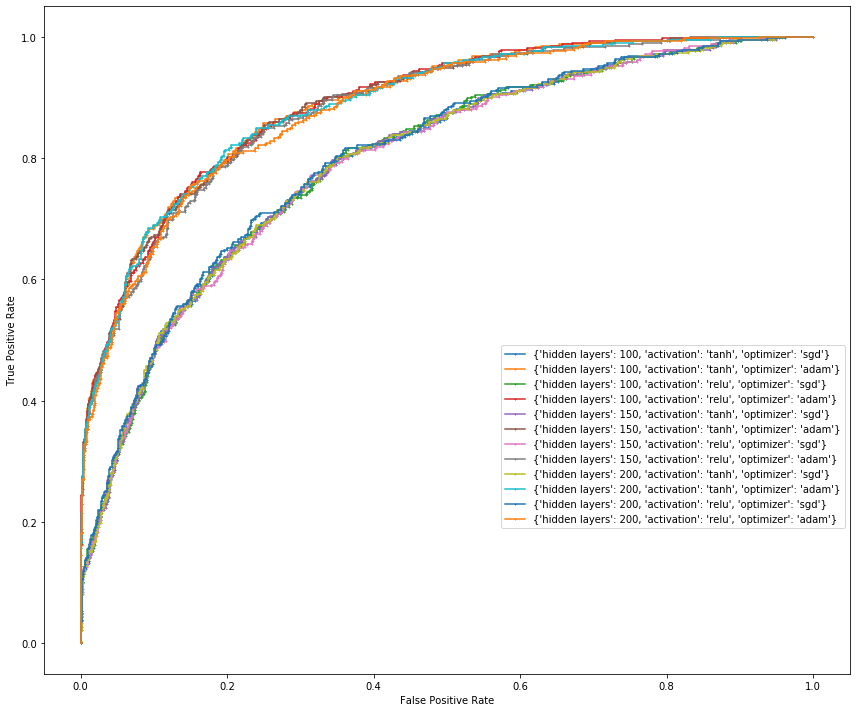

Wall time: 2min 20s


In [70]:
%%time
f_score = []

plt.figure(figsize = [12.0,10.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

for classifier in classifiers:
    
    label = {'hidden layers':classifier.hidden_layer_sizes,
             'activation':classifier.activation,
             'optimizer':classifier.solver}
    
    pipe = get_pipe(df, classifier)
    
    pipe.fit(X_train, y_train)
    
    y_pred = pipe.predict(X_test)
    y_score = pipe.predict_proba(X_test)
        
    score = f1_score(y_test, y_pred)
    f_score.append(score)
    
    fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
    
    plt.plot(fpr, tpr, marker = '+', markersize = 2, label = label)
    
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

In [71]:
d = {'MLP Model': classifiers, 'F1 Score': f_score}
fscore_df = pd.DataFrame(data = d)
fscore_df

,MLP Model,F1 Score
0,"MLPClassifier(activation='tanh', alpha=0.0001,...",0.279070
1,"MLPClassifier(activation='tanh', alpha=0.0001,...",0.590909
2,"MLPClassifier(activation='relu', alpha=0.0001,...",0.300000
3,"MLPClassifier(activation='relu', alpha=0.0001,...",0.620887
4,"MLPClassifier(activation='tanh', alpha=0.0001,...",0.287356
5,"MLPClassifier(activation='tanh', alpha=0.0001,...",0.601190
6,"MLPClassifier(activation='relu', alpha=0.0001,...",0.273438
7,"MLPClassifier(activation='relu', alpha=0.0001,...",0.627756
8,"MLPClassifier(activation='tanh', alpha=0.0001,...",0.293333
9,"MLPClassifier(activation='tanh', alpha=0.0001,...",0.620592


In [72]:
best_mlp_model = fscore_df[fscore_df['F1 Score'] == fscore_df.max().values[0]]['MLP Model'].values[0]

In [73]:
best_mlp_model

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=150, learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

#### (7)

In [74]:
classifier_list = [
    DecisionTreeClassifier(),
    GaussianNB(),
    LogisticRegression(class_weight='balanced'),
    best_mlp_model    
    ]

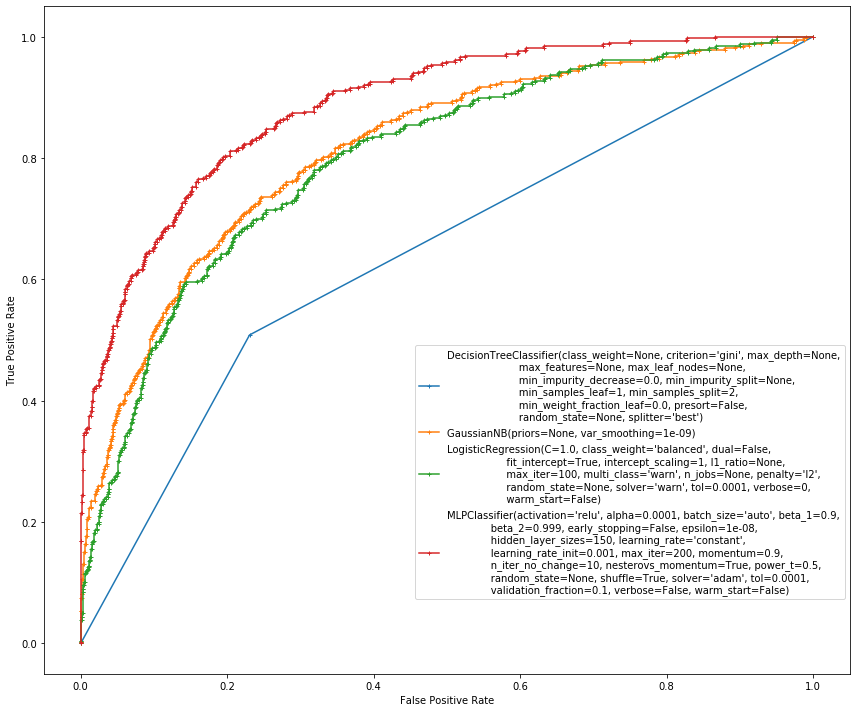

In [75]:
plt.figure(figsize = [12.0,10.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

for classifier in classifier_list:
    pipe = get_pipe(df, classifier)
    
    pipe.fit(X_train, y_train) 
    y_score = pipe.predict_proba(X_test)
    
    fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
    
    plt.plot(fpr, tpr, marker = '+', markersize = 4, label = classifier)

plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

#### (8)

In [76]:
classifier_list = [
    GaussianNB(),
    LogisticRegression(class_weight='balanced'),
    best_mlp_model    
    ]

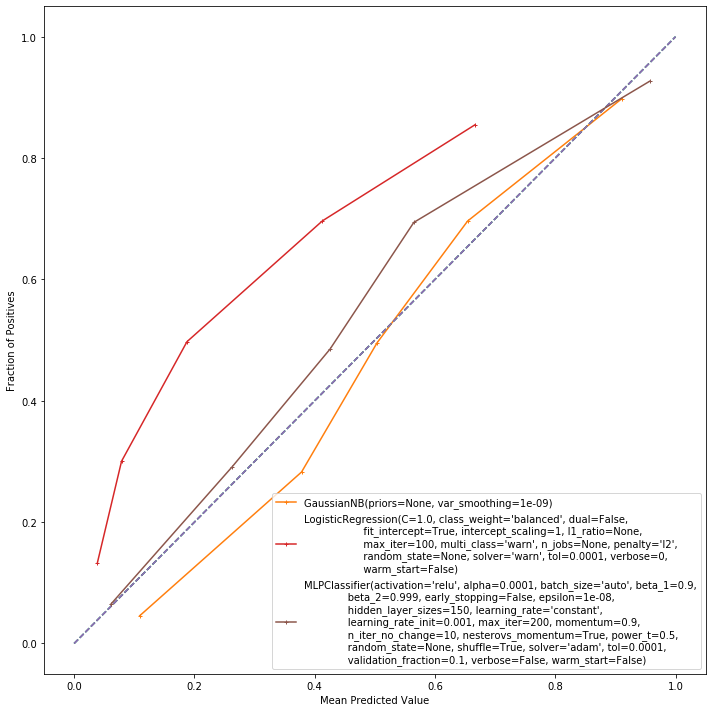

In [77]:
from sklearn.calibration import calibration_curve

plt.figure(figsize=(10, 10))
plt.xlabel('Mean Predicted Value')
plt.ylabel('Fraction of Positives')

for classifier in classifier_list:
    pipe = get_pipe(df, classifier)

    pipe.fit(X_train, y_train)
    prob_pos = pipe.predict_proba(X_test)

    fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_pos[:,1])
    
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fraction_of_positives, mean_predicted_value, 
             marker = '+', markersize = 4, label = classifier)

plt.legend(loc='best')
plt.tight_layout()
plt.show()

The diagonal dashed line represents a perfectly calibrated model. From the three models considered, the MLP classifier and Gaussian Naive Bayes models seem to be well calibrated and the Logistic Regression model does not seem to be well calibrated.